In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = {
    'Model': ['DialoGPT', 'BlenderBot', 'ChatGPT-Turbo', 'Mistral', 'Gemini Nano'],
    'BLEU Score': [30, 35, 40, 38, 36],
    'Diversity Score': [0.75, 0.78, 0.80, 0.77, 0.79],
    'Latency (ms)': [120, 150, 100, 110, 130],
    'Parameter Size (GB)': [6.5, 8.0, 12.0, 10.5, 7.8]
}

df = pd.DataFrame(data)
print("Dataset:")
print(df)


Dataset:
           Model  BLEU Score  Diversity Score  Latency (ms)  \
0       DialoGPT          30             0.75           120   
1     BlenderBot          35             0.78           150   
2  ChatGPT-Turbo          40             0.80           100   
3        Mistral          38             0.77           110   
4    Gemini Nano          36             0.79           130   

   Parameter Size (GB)  
0                  6.5  
1                  8.0  
2                 12.0  
3                 10.5  
4                  7.8  


In [3]:
weights = np.array([1, 1, -1, -1])

In [4]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df.iloc[:, 1:])
df_normalized = pd.DataFrame(normalized_data, columns=df.columns[1:], index=df['Model'])

In [5]:
weighted_normalized_data = normalized_data * weights
df_weighted_normalized = pd.DataFrame(weighted_normalized_data, columns=df.columns[1:], index=df['Model'])

In [6]:
ideal_best = np.max(weighted_normalized_data, axis=0)
ideal_worst = np.min(weighted_normalized_data, axis=0)

In [7]:
dist_best = np.linalg.norm(weighted_normalized_data - ideal_best, axis=1)
dist_worst = np.linalg.norm(weighted_normalized_data - ideal_worst, axis=1)

In [8]:
topsis_scores = dist_worst / (dist_best + dist_worst)
df['TOPSIS Score'] = topsis_scores


In [9]:
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)
print("\nFinal Rankings:")
print(df.sort_values(by='Rank'))


Final Rankings:
           Model  BLEU Score  Diversity Score  Latency (ms)  \
2  ChatGPT-Turbo          40             0.80           100   
4    Gemini Nano          36             0.79           130   
3        Mistral          38             0.77           110   
1     BlenderBot          35             0.78           150   
0       DialoGPT          30             0.75           120   

   Parameter Size (GB)  TOPSIS Score  Rank  
2                 12.0      0.647904   1.0  
4                  7.8      0.623995   2.0  
3                 10.5      0.563966   3.0  
1                  8.0      0.461879   4.0  
0                  6.5      0.430503   5.0  


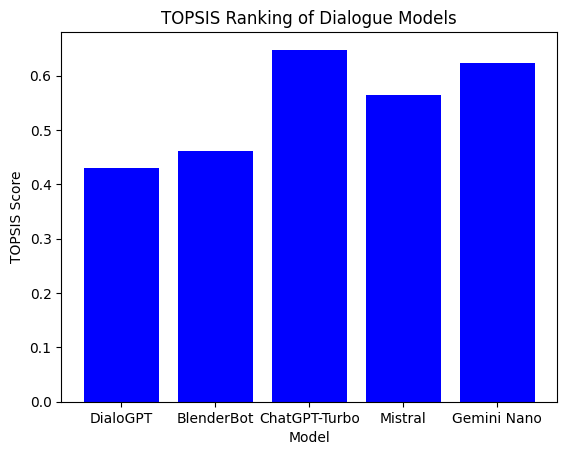

In [10]:
plt.bar(df['Model'], df['TOPSIS Score'], color='blue')
plt.xlabel('Model')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Ranking of Dialogue Models')
plt.show()
